## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 005 Example 013

## Part A - Load Libraries

In [1]:
from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
rng = np.random.RandomState(1968)
xmin,xmax,ymin,ymax = [-4, 4,-4, 4]
n1=1968
n2=150

In [4]:
def plot_scatter(X, y, title):
    fig = plt.figure(figsize=(12, 14))
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1', marker='*')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0', marker='o')
    plt.legend()
    plt.title(title)
    plt.axis([xmin,xmax,ymin,ymax])
    plt.show()
    return fig

## Part B - Scatter Plot of Training Data Sets

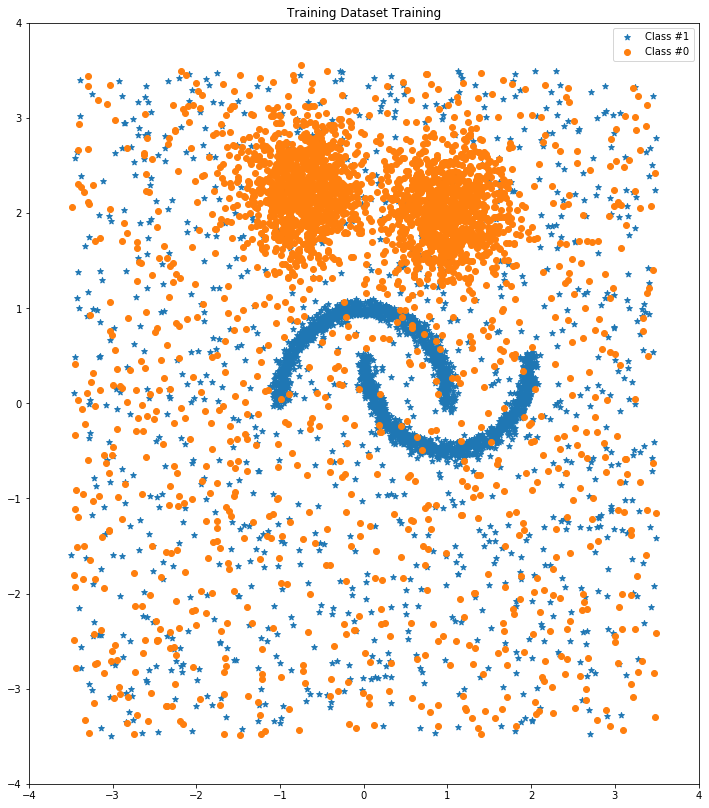

In [5]:
moons, _ = make_moons(n_samples=n1, 
                      noise=0.05
                     )

blobs, _ = make_blobs(n_samples=n1, 
                      centers=[(-0.75, 2.25), (1.0, 2.0)], 
                      cluster_std=0.35
                     )

outliers = rng.uniform(low=-3.5, high=3.5, size=(n1, 2))

X_train = np.vstack([moons, blobs, outliers])

y_train = np.hstack([np.ones(moons.shape[0], dtype=np.int8),
                     np.zeros(blobs.shape[0], dtype=np.int8),
                     rng.randint(0, 2, size=outliers.shape[0],
                                 dtype=np.int8)])


fig1=plot_scatter(X_train, y_train, 'Training Dataset Training')

## Part C - Scatter Plot

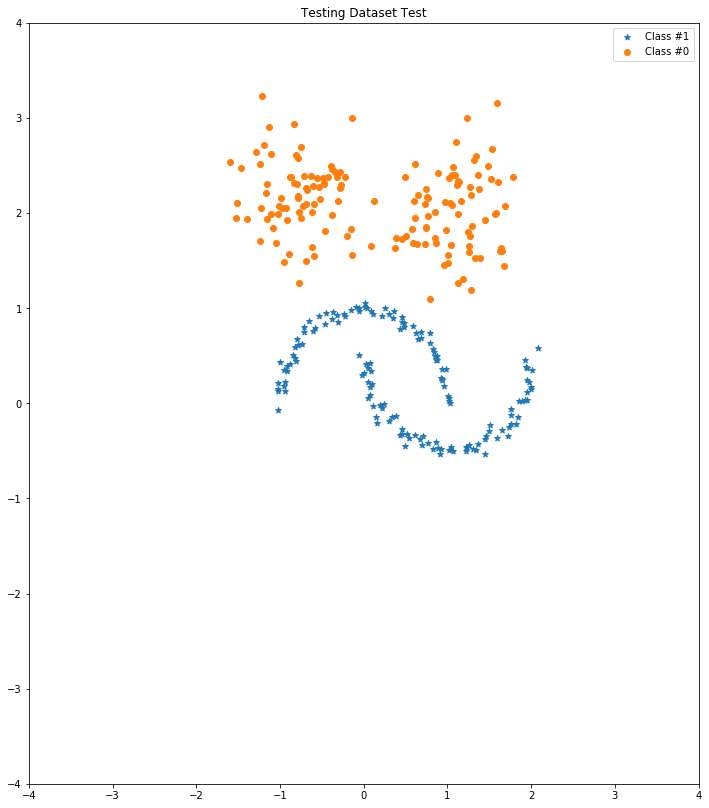

In [6]:
moons, _ = make_moons(n_samples=n2, noise=0.05)

blobs, _ = make_blobs(n_samples=n2, centers=[(-0.75, 2.25),
                                             (1.0, 2.0)],
                      cluster_std=0.35)

X_test = np.vstack([moons, blobs])

y_test = np.hstack([np.ones(moons.shape[0], dtype=np.int16),
                    np.zeros(blobs.shape[0], dtype=np.int16)])

fig2=plot_scatter(X_test, y_test, 'Testing Dataset Test')

## Part D - Scatter Plot

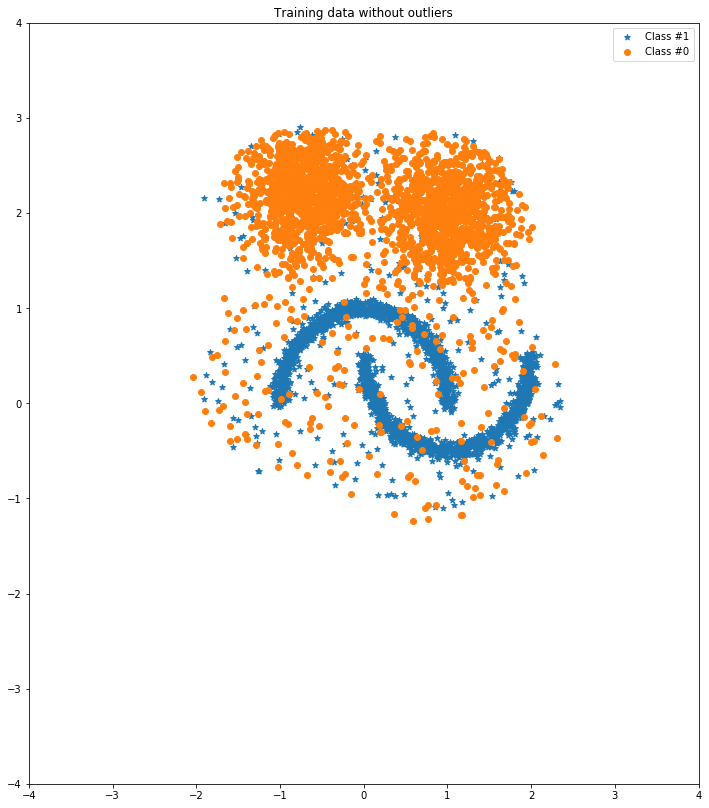

In [7]:
def outlier_rejection(X, y):
    model = IsolationForest(max_samples='auto',
                            contamination='auto',
                            random_state=rng,
                            behaviour='new',
                            bootstrap=True
                           )
    model.fit(X)
    y_pred = model.predict(X)
    return X[y_pred == 1], y[y_pred == 1]


reject_sampler = FunctionSampler(func=outlier_rejection)

X_inliers, y_inliers = reject_sampler.fit_resample(X_train, y_train)

fig3=plot_scatter(X_inliers, y_inliers, 'Training data without outliers')

In [8]:
pipe = make_pipeline(FunctionSampler(func=outlier_rejection),
                     LogisticRegression(solver='newton-cg',
                                        penalty='l2',
                                        class_weight='balanced',
                                        multi_class='auto',
                                        random_state=rng
                                       )
                    )

y_pred = pipe.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.99      1.00      0.99       150

   micro avg       0.99      0.99      0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [9]:
clf = LogisticRegression(solver='newton-cg',
                         penalty='l2',
                         class_weight='balanced',
                         multi_class='auto', 
                         random_state=rng
                        )

y_pred = clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       150
           1       1.00      0.81      0.90       150

   micro avg       0.91      0.91      0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



## Save Figures

In [10]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-013-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-013-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight')    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-013-03.jpg'])
fig3.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


## Done

In [11]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-17 21:06:33.832871
